In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


### Importation des données

In [366]:
raw = pd.read_csv("Wlraw_2y.csv",index_col=False)
cleaned = pd.read_csv("Wlraw_clean_2y.csv",index_col=False)
cleaned.head()

,Unnamed: 0,DateTime,RWL04
0,0,2018-01-01 05:15:00,133.7
1,1,2018-01-01 05:21:00,133.8
2,2,2018-01-01 05:39:00,134.0
3,3,2018-01-01 06:30:00,133.8
4,4,2018-01-01 06:33:00,133.7


### Resampling des données

In [367]:
raw["RWL04"] = raw["RWL04"].apply(lambda x : x if 127 < x < 258 else np.nan)
cleaned["RWL04"] = cleaned["RWL04"].apply(lambda x : x if 127 < x < 258 else np.nan)

raw["DateTime"] = pd.to_datetime(raw["DateTime"])
cleaned["DateTime"] = pd.to_datetime(cleaned["DateTime"])

raw.set_index("DateTime",drop=False,inplace=True)

cleaned.set_index("DateTime",drop=False,inplace=True)


### Construction du data training set

### Apprentissage automatique

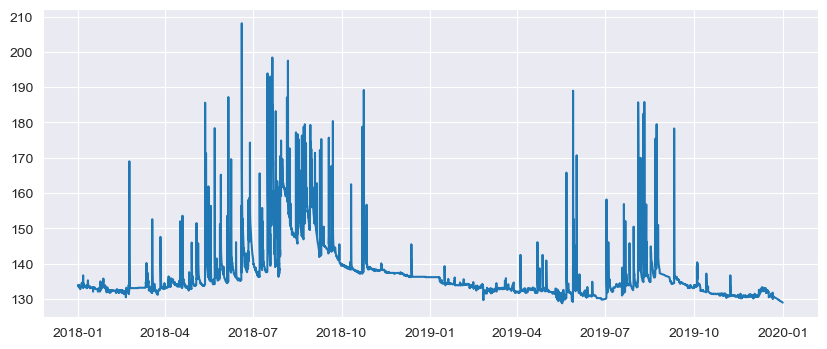

In [370]:
plt.figure(figsize=(10,4))
plt.plot(cleaned["RWL04"])


In [365]:
raw = raw.resample('D').mean()

cleaned = cleaned.resample('D').mean()
raw

,DateTime,RWL04
DateTime,,
2018-01-01,2018-01-01 08:33:55.384615424,133.746154
2018-01-02,2018-01-02 11:51:32.727272704,133.572727
2018-01-03,2018-01-03 09:28:12.000000000,133.080000
2018-01-04,2018-01-04 21:19:41.249999872,133.943750
2018-01-05,2018-01-05 07:45:00.000000000,133.910000
...,...,...
2019-12-24,NaT,NaN
2019-12-25,NaT,NaN
2019-12-26,NaT,NaN


In [362]:
merged_data["DateTime"] = cleaned["DateTime"]




In [363]:
merged_data

,RWL04,Unnamed: 0,DateTime
DateTime,,,
NaT,127.316667,NaN,NaT
NaT,129.000000,21489.0,NaT
NaT,129.092308,NaN,NaT
NaT,129.211111,NaN,NaT
NaT,129.300000,21488.0,NaT
...,...,...,...
NaT,NaN,NaN,NaT
NaT,NaN,NaN,NaT
NaT,NaN,NaN,NaT


In [ ]:
merged_data["cleaned_RWL04"] = cleaned["RWL04"]

merged_data["raw_RWL04"] = raw["RWL04"]

In [ ]:
merged_data["DateTime"] = pd.to_datetime(merged_data["DateTime"])

In [ ]:
# Extracting date features
merged_data['month'] = merged_data['DateTime'].dt.month
merged_data['day'] = merged_data['DateTime'].dt.day
merged_data['hour'] = merged_data['DateTime'].dt.hour

# Defining features and target
X = merged_data[['month', 'day','hour', 'raw_RWL04']]
y = merged_data['cleaned_RWL04']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Displaying the model coefficients






In [ ]:
merged_data["day"]

In [ ]:
merged_data["predicted_RWL04"] = model.predict(X)

In [ ]:
merged_data

In [ ]:
plt.plot(cleaned["RWL04"],label="RWL04 cleaned (objective)")
plt.plot(raw["RWL04"],label="RWL04 raw")
plt.plot(merged_data["predicted_RWL04"],label="RWL04 predicted")
plt.legend()

In [ ]:
data_raw = pd.read_csv("Wlraw.csv")
data_cleaned = pd.read_csv("Wlraw_clean.csv")
data_raw["DateTime"] = pd.to_datetime(data_raw["DateTime"])
data_cleaned["DateTime"] = pd.to_datetime(data_cleaned["DateTime"])

In [ ]:
data_raw.set_index("DateTime", inplace=True)
data_cleaned.set_index("DateTime",inplace=True)

print(len(data_cleaned))
print(len(data_raw))
data_cleaned.dropna(axis=0,inplace=True)
data_raw.dropna(axis=0,inplace=True)

In [ ]:
print(len(data_raw))
print(len(data_cleaned))

In [ ]:
data_raw_by_week = data_raw.resample("ME").mean().reset_index()
data_cleaned_by_week = data_cleaned.resample("ME").mean().reset_index()

In [ ]:
len(data_raw_by_week)

In [ ]:
len(data_cleaned_by_week)

In [ ]:
data = pd.DataFrame()
data["DateTime"] = pd.to_datetime(data_raw_by_week["DateTime"])
data["raw_RWL04"] = data_raw_by_week["RWL04"].apply(lambda x : x if 127 < x < 258 else np.nan)
data["WL_clean"] = data_cleaned_by_week["RWL04"].apply(lambda x : x if 127 < x < 258 else np.nan)

data['month'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day

data.dropna(axis=0,inplace=True)

In [ ]:
data["predicted"] = model.predict(data[['month', 'day', 'raw_RWL04']])
mse = mean_squared_error(data["WL_clean"], data["predicted"])
print(f'Mean Squared Error: {mse}')

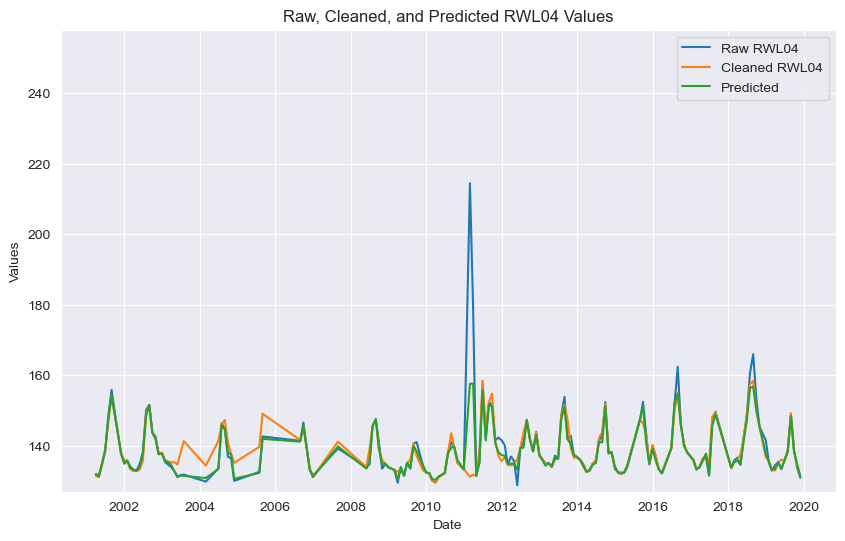

In [372]:
# Définir les dates de début et de fin pour le filtre
start_date = '2001-01-01'
end_date = '2020-01-01'

# Filtrer les données
filtered_data = data[(data['DateTime'] >= start_date) & (data['DateTime'] <= end_date)]
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['DateTime'], filtered_data['raw_RWL04'], label='Raw RWL04')
plt.plot(filtered_data['DateTime'], filtered_data['WL_clean'], label='Cleaned RWL04')
plt.plot(filtered_data['DateTime'], filtered_data['predicted'], label='Predicted')

# Setting y-axis limit
plt.ylim(127, 258)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Raw, Cleaned, and Predicted RWL04 Values')
plt.legend()

# Display the plot
plt.show()

In [ ]:
plt.plot(data['DateTime'], data['WL_clean'], label='')
plt.plot(data['DateTime'], data['predicted'], label='')

In [ ]:
sns.boxplot(data["WL_clean"])

In [ ]:
sns.boxplot(data["predicted"])

In [371]:
from scipy.stats import ttest_ind

# Comparer les moyennes des deux périodes pour la colonne 'cleaned_RWL04'
t_stat, p_value = ttest_ind(data['WL_clean'], data['predicted'], equal_var=False)

# Afficher les résultats du test t
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Vérifier la significativité
alpha = 0.05
if p_value < alpha:
    print("Les moyennes des deux périodes sont statistiquement différentes.")
else:
    print("Les moyennes des deux périodes ne sont pas statistiquement différentes.")

T-statistic: 0.5362995559444603
P-value: 0.5921152658093425
Les moyennes des deux périodes ne sont pas statistiquement différentes.


In [ ]:

data_cleaned = pd.read_csv("Wlraw_clean.csv")
data_cleaned.dropna(inplace=True)


In [ ]:
plt.plot(data_cleaned["RWL04"])
plt.plot(data["predicted"])

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Exemple de création d'un DataFrame avec des données mensuelles


# Rééchantillonner les données à une granularité plus fine (par exemple, journalière)
fine_grained_data = data.resample('D').asfreq()

# Interpolation linéaire
fine_grained_data['value'] = fine_grained_data['predicted'].interpolate(method='linear')

# Vous pouvez également utiliser des méthodes plus sophistiquées comme 'spline' ou 'polynomial'
# Interpolation spline
fine_grained_data['value_spline'] = fine_grained_data['predicted'].interpolate(method='spline', order=3)

# Afficher les données interpolées
print(fine_grained_data.head(30))

# Tracer les données pour visualiser l'interpolation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Original Monthly Data', marker='o')
plt.plot(fine_grained_data.index, fine_grained_data['value'], label='Interpolated Daily Data (Linear)')
plt.plot(fine_grained_data.index, fine_grained_data['value_spline'], label='Interpolated Daily Data (Spline)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Interpolation of Time Series Data')
plt.legend()
plt.show()